In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('Delhi NCR.csv')

In [3]:
data.head()

,Name,Price,Cuisine_Category,City,Region,Cuisine_Type,Timing,Rating_Types,Rating,Votes
0,POMP - Pizza On My Plate,800,"Pizza,Italian,Desserts,Burger,American",Delhi NCR,Greater Kailash 1 (GK1),none,11am to 4am(Mon-Sun),Excellent,4.6,1244
1,Shawarma House,500,"Healthy Food,Wraps,Lebanese",Delhi NCR,Central Plaza Mall-- Golf Course Road,Quick Bites,11am to 4am(Mon-Sun),Very Good,4.4,1408
2,Qwinny's,1000,"Asian,Thai,Chinese,Sushi,Poké",Delhi NCR,DLF Phase 4,none,"11am to 12midnight(Mon,Tue,Wed,Thu,Sun),11am...",Excellent,4.5,619
3,Boa Village,1500,"Chinese,Japanese,Korean,Asian,Momos",Delhi NCR,Civil Lines,Casual Dining,11am to 1am(Mon-Sun),Very Good,4.3,1662
4,Giani's,300,"Desserts,Ice Cream,Beverages",Delhi NCR,Greater Kailash 2 (GK2),Dessert Parlor,12noon to 1am(Mon-Sun),Very Good,4.0,517


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13284 entries, 0 to 13283
Data columns (total 10 columns):
Name                13284 non-null object
Price               13284 non-null int64
Cuisine_Category    13283 non-null object
City                13284 non-null object
Region              13284 non-null object
Cuisine_Type        13284 non-null object
Timing              13259 non-null object
Rating_Types        13284 non-null object
Rating              13284 non-null float64
Votes               13284 non-null int64
dtypes: float64(1), int64(2), object(7)
memory usage: 1.0+ MB


#This means that we can make stats using Price, Votes, and Rating as only these ore of datatypes int and float 

In [5]:
data.columns

Index(['Name', 'Price', 'Cuisine_Category', 'City', 'Region', 'Cuisine_Type',
       'Timing', 'Rating_Types', 'Rating', 'Votes'],
      dtype='object')

In [6]:
data.describe()

,Price,Rating,Votes
count,13284.000000,13284.000000,13284.000000
mean,462.520852,3.483424,140.733589
std,307.229776,0.403908,325.731326
min,0.000000,2.000000,1.000000
25%,300.000000,3.200000,14.000000
50%,400.000000,3.500000,41.000000
75%,500.000000,3.700000,127.000000
max,6000.000000,4.900000,7704.000000


In [7]:
data.isna().sum()

Name                 0
Price                0
Cuisine_Category     1
City                 0
Region               0
Cuisine_Type         0
Timing              25
Rating_Types         0
Rating               0
Votes                0
dtype: int64

In [8]:
data.Name.value_counts().head()

Punjabi Tadka                  19
Shama Chicken Corner           13
Apni Rasoi                     12
Punjabi Rasoi                  11
Bikaner Sweets & Restaurant    11
Name: Name, dtype: int64

# How many restaurants are located in which Region

In [9]:
data['Region'].value_counts()[:10]

Rohini               431
Uttam Nagar          245
Indirapuram          228
Malviya Nagar        199
DLF Phase 3          198
Pitampura            188
Janakpuri            176
NIT                  170
Paschim Vihar        160
Sector 72-- Noida    157
Name: Region, dtype: int64

Text(0.5,1,'Region')

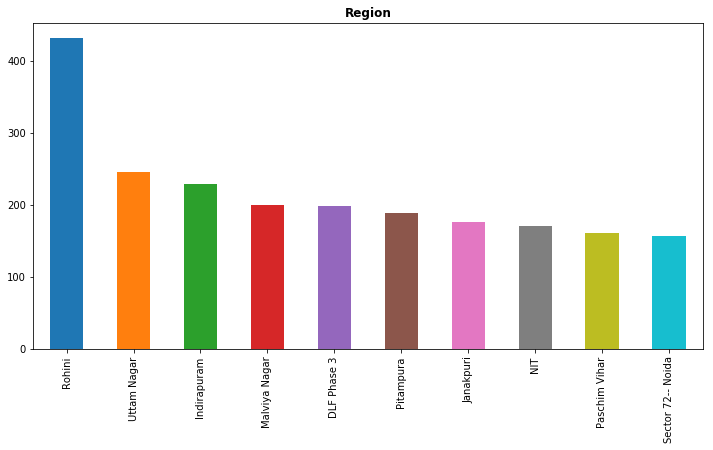

In [10]:
plt.figure(figsize=(12,6)) 
data['Region'].value_counts()[:10].plot(kind = 'bar')
plt.title('Region', weight = 'bold')

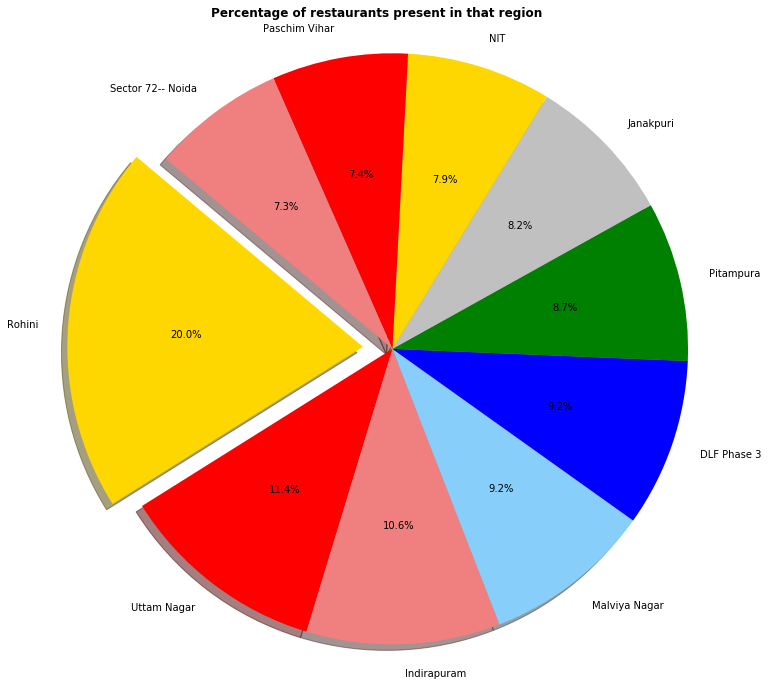

In [11]:
plt.figure(figsize = (12,12))
names = data['Region'].value_counts()[:10].index
values = data['Region'].value_counts()[:10].values
colors = ['gold', 'red', 'lightcoral', 'lightskyblue','blue','green','silver']
explode = (0.1, 0, 0, 0,0,0,0,0,0,0)  # explode 1st slice

plt.pie(values, explode=explode, labels=names, colors=colors,autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title("Percentage of restaurants present in that region", weight = 'bold')


plt.show()

In [12]:
data['Rating_Types'].value_counts().head(10)

Average        6261
Good           5298
Very Good      1469
Excellent       147
Poor             47
Bueno            10
Muito Bom         6
Baik              5
Sangat Baik       5
Bom               4
Name: Rating_Types, dtype: int64

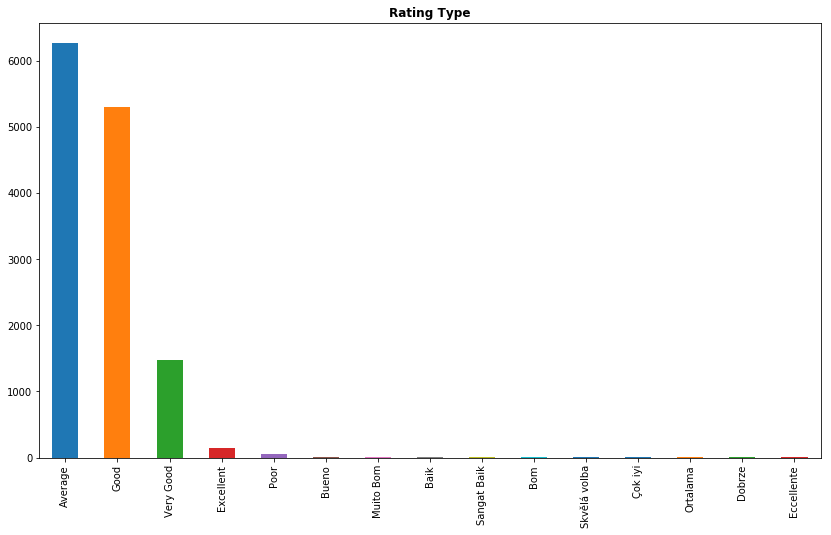

In [13]:
plt.figure(figsize = (14,8))
data.Rating_Types.value_counts()[:15].plot(kind = 'bar')
plt.title('Rating Type', weight = 'bold')
plt.show()

# Cuisine Types

In [14]:
data['Cuisine_Type'].value_counts().head(10)

Quick Bites       5717
none              3306
Casual Dining     1594
Bakery             795
Café               473
Dhaba              316
Sweet Shop         258
Dessert Parlor     228
Food Court         131
Kiosk               78
Name: Cuisine_Type, dtype: int64

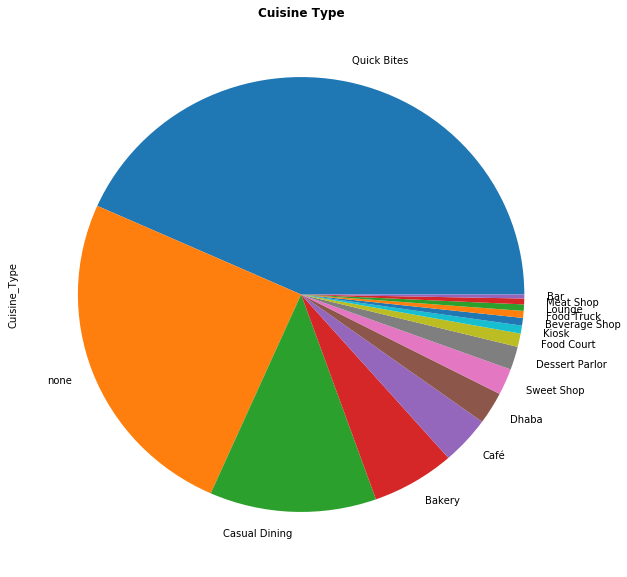

In [15]:
plt.figure(figsize = (10,10))
data.Cuisine_Type.value_counts()[:15].plot(kind = 'pie')
plt.title('Cuisine Type', weight = 'bold')
plt.show()

In [16]:
#We have the most frequently visited Restaurant type - Quickbites

# Ratings

In [17]:
data['Rating'] = data['Rating'].replace('NEW',np.NaN)
data['Rating'] = data['Rating'].replace('-',np.NaN)
data.dropna(how = 'any', inplace = True)

In [18]:
data['Rating'] = data.loc[:,'Rating'].replace('[ ]','',regex = True)
data['Rating'] = data['Rating'].astype(str)
data['Rating'] = data['Rating'].apply(lambda r: r.replace('/5',''))
data['Rating'] = data['Rating'].apply(lambda r: float(r))

3.4835495549856854


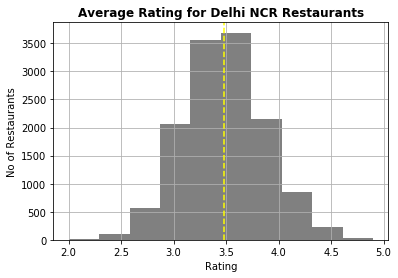

In [19]:
data.Rating.hist(color='grey')
plt.axvline(x= data.Rating.mean(),ls='--',color='yellow')
plt.title('Average Rating for Delhi NCR Restaurants',weight='bold')
plt.xlabel('Rating')
plt.ylabel('No of Restaurants')
print(data.Rating.mean())

In [20]:
#Average rating per restaurant in Bhopal is found to be around 3.4

# Top cuisines in Delhi NCR

In [21]:
cuisines_count= []

for i in data.Cuisine_Category:
    for j in i.split(','):
        j = j.strip()
        cuisines_count.append(j)

Text(0,0.5,'No of restaurants')

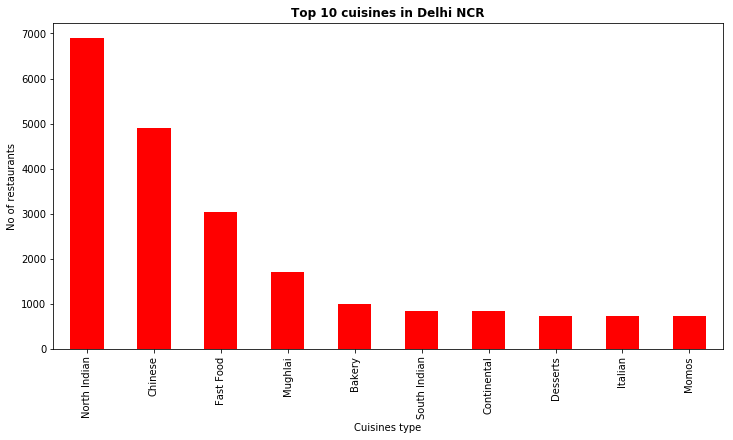

In [22]:
plt.figure(figsize=(12,6)) 
pd.Series(cuisines_count).value_counts()[:10].plot(kind='bar',color= 'r')
plt.title('Top 10 cuisines in Delhi NCR',weight='bold')
plt.xlabel('Cuisines type')
plt.ylabel('No of restaurants')

# Average Cost

In [23]:
data['Price'].value_counts()[:20]

300     2194
400     1968
500     1814
200     1271
600      915
250      826
350      765
700      480
150      452
450      428
800      408
100      266
1000     229
550      191
650      187
750      120
900      114
1200     112
1500      93
1100      54
Name: Price, dtype: int64

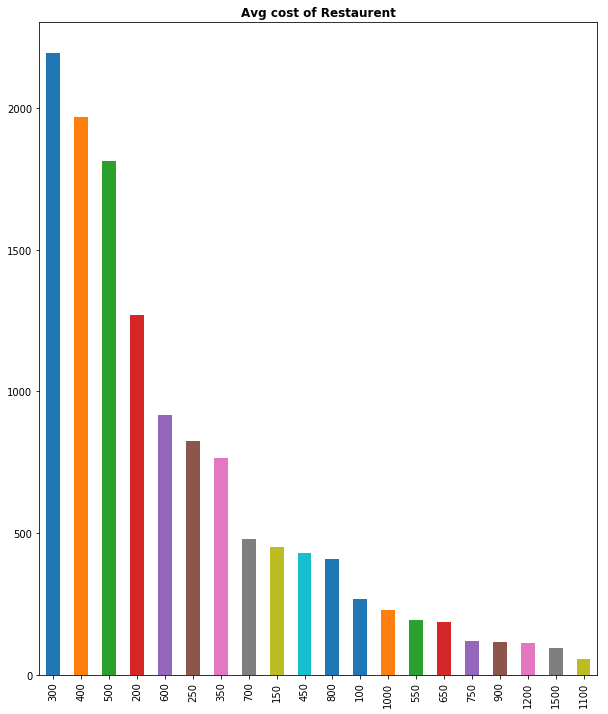

In [24]:
plt.figure(figsize = (10,12))
data['Price'].value_counts()[:20].plot(kind = 'bar')
plt.title('Avg cost of Restaurent', weight = 'bold')
plt.show()

In [25]:
colors  = ("red", "green", "orange", "cyan", "brown", "grey", "blue", "indigo", "beige", "yellow")

Text(0.5,1,'Average cost for 2 people in Rupees')

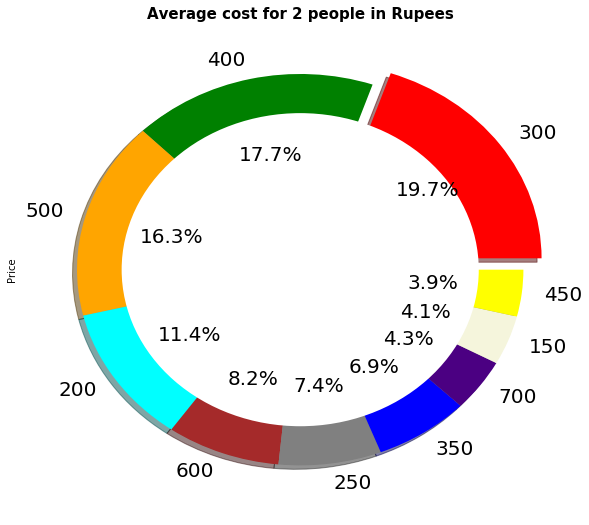

In [26]:
fig= plt.figure(figsize=(10, 9))
explode = (0.1, 0, 0, 0,0,0,0,0,0,0) 

delplot = data['Price'].value_counts()[:10].plot(kind = 'pie',autopct='%1.1f%%',fontsize=20,shadow=True,explode = explode,colors = colors)

#draw circle
centre_circle = plt.Circle((0,0),0.80,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title("Average cost for 2 people in Rupees",fontsize = 15,weight = 'bold')

#This implies that the average price of the restaurant is 300